<a href="https://colab.research.google.com/github/AverageWeebo101/CS20L-12044-Machine-Learning-Project/blob/main/MLComparativeAnalysisStuff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**USE GPU for RUNTIME, although only do it once stuff are ready...**

In [ ]:
# Mount Google Drive to access files and save outputs
# Optional
from google.colab import drive
drive.mount('/content/drive')

base_drive_path = '/content/drive/My Drive/CS20L12044-FinalProject'

# Create directories in your Drive for datasets and outputs if they don't exist
import os
datasets_dir = os.path.join(base_drive_path, 'datasets')
outputs_dir = os.path.join(base_drive_path, 'outputs')

if not os.path.exists(datasets_dir):
  os.makedirs(datasets_dir)
  print(f"Created datasets directory: {datasets_dir}")

if not os.path.exists(outputs_dir):
  os.makedirs(outputs_dir)
  print(f"Created outputs directory: {outputs_dir}")

In [3]:
!pip install --upgrade pip
!pip install datasets transformers scikit-learn pandas numpy matplotlib
!pip install kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
!pip install tensorflow

In [57]:
!pip install --upgrade tensorflow keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 98.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 53.5 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [24]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json


In [25]:
!kaggle datasets download -d mdepak/fakenewsnet
!unzip fakenewsnet.zip -d fakenewsnet_data

Dataset URL: https://www.kaggle.com/datasets/mdepak/fakenewsnet
License(s): CC-BY-NC-SA-4.0
 84% 14.0M/16.6M [00:00<00:00, 128MB/s]
100% 16.6M/16.6M [00:00<00:00, 110MB/s]
Archive:  fakenewsnet.zip
  inflating: fakenewsnet_data/BuzzFeedNews.txt  
  inflating: fakenewsnet_data/BuzzFeedNewsUser.txt  
  inflating: fakenewsnet_data/BuzzFeedUser.txt  
  inflating: fakenewsnet_data/BuzzFeedUserFeature.mat  
  inflating: fakenewsnet_data/BuzzFeedUserUser.txt  
  inflating: fakenewsnet_data/BuzzFeed_fake_news_content.csv  
  inflating: fakenewsnet_data/BuzzFeed_real_news_content.csv  
  inflating: fakenewsnet_data/PolitiFactNews.txt  
  inflating: fakenewsnet_data/PolitiFactNewsUser.txt  
  inflating: fakenewsnet_data/PolitiFactUser.txt  
  inflating: fakenewsnet_data/PolitiFactUserFeature.mat  
  inflating: fakenewsnet_data/PolitiFactUserUser.txt  
  inflating: fakenewsnet_data/PolitiFact_fake_news_content.csv  
  inflating: fakenewsnet_data/PolitiFact_real_news_content.csv  


In [2]:
# Pre processing part

import os
import pandas as pd

base_dir = "fakenewsnet_data"
dfs = []

for source in ["PolitiFact", "GossipCop"]:
    real_csv = os.path.join(base_dir, f"{source}_real_news_content.csv")
    fake_csv = os.path.join(base_dir, f"{source}_fake_news_content.csv")

    source_dfs = []
    if os.path.exists(real_csv):
        df_real = pd.read_csv(real_csv)
        df_real['label'] = 'real'
        source_dfs.append(df_real)
    if os.path.exists(fake_csv):
        df_fake = pd.read_csv(fake_csv)
        df_fake['label'] = 'fake'
        source_dfs.append(df_fake)

    if source_dfs:
        combined = pd.concat(source_dfs, ignore_index=True)
        combined['source'] = source
        dfs.append(combined)

fn_df = pd.concat(dfs, ignore_index=True)
fn_df['label_norm'] = fn_df['label'].map({'fake': 1, 'real': 0})
fn_df['full_text'] = fn_df['title'].fillna('') + ". " + fn_df['text'].fillna('')

print(fn_df.info())
print(fn_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              240 non-null    object
 1   title           240 non-null    object
 2   text            240 non-null    object
 3   url             236 non-null    object
 4   top_img         236 non-null    object
 5   authors         214 non-null    object
 6   source          240 non-null    object
 7   publish_date    162 non-null    object
 8   movies          14 non-null     object
 9   images          236 non-null    object
 10  canonical_link  230 non-null    object
 11  meta_data       240 non-null    object
 12  label           240 non-null    object
 13  label_norm      240 non-null    int64 
 14  full_text       240 non-null    object
dtypes: int64(1), object(14)
memory usage: 28.3+ KB
None
                 id                                              title  \
0    Real_1-Webp

In [3]:
# File Inspection

import os, json, pandas as pd

base_dir = "fakenewsnet_data"

if not os.path.exists(base_dir):
    os.makedirs(base_dir)
    print(f"Created directory: {base_dir}")

!unzip -o fakenewsnet.zip -d fakenewsnet_data

print(f"Contents of {base_dir} after unzip:")
print(os.listdir(base_dir))
print("-" * 20)

for source in ["PolitiFact", "GossipCop"]:
    src_dir = os.path.join(base_dir, source)

    if not os.path.exists(src_dir):
        print(f"Error: Source directory {src_dir} not found after unzip.")

        continue

    print("Files in", src_dir, ":", os.listdir(src_dir))
    json_files = [f for f in os.listdir(src_dir) if f.endswith(".json")]

    if not json_files:
        print(f"No JSON files found in {src_dir}.")
        continue

    for jf in json_files:
        path = os.path.join(src_dir, jf)
        try:
            with open(path, 'r') as f:
                data = json.load(f)
            print(f"Loaded {jf}, number of entries:", len(data))
            df = pd.DataFrame(data)
            print(df.head())
            break
        except Exception as e:
            print(f"Error loading or processing {jf}: {e}")

Archive:  fakenewsnet.zip
  inflating: fakenewsnet_data/BuzzFeedNews.txt  
  inflating: fakenewsnet_data/BuzzFeedNewsUser.txt  
  inflating: fakenewsnet_data/BuzzFeedUser.txt  
  inflating: fakenewsnet_data/BuzzFeedUserFeature.mat  
  inflating: fakenewsnet_data/BuzzFeedUserUser.txt  
  inflating: fakenewsnet_data/BuzzFeed_fake_news_content.csv  
  inflating: fakenewsnet_data/BuzzFeed_real_news_content.csv  
  inflating: fakenewsnet_data/PolitiFactNews.txt  
  inflating: fakenewsnet_data/PolitiFactNewsUser.txt  
  inflating: fakenewsnet_data/PolitiFactUser.txt  
  inflating: fakenewsnet_data/PolitiFactUserFeature.mat  
  inflating: fakenewsnet_data/PolitiFactUserUser.txt  
  inflating: fakenewsnet_data/PolitiFact_fake_news_content.csv  
  inflating: fakenewsnet_data/PolitiFact_real_news_content.csv  
Contents of fakenewsnet_data after unzip:
['BuzzFeed_real_news_content.csv', 'BuzzFeedNewsUser.txt', 'BuzzFeedUser.txt', 'BuzzFeedUserUser.txt', 'PolitiFactUserUser.txt', 'BuzzFeed_fake_ne

In [4]:
from sklearn.model_selection import train_test_split

train_df_fn, temp = train_test_split(
    fn_df, test_size=0.3,
    stratify=fn_df['label_norm'],
    random_state=42
)
val_df_fn, test_df_fn = train_test_split(
    temp, test_size=0.5,
    stratify=temp['label_norm'],
    random_state=42
)

print("Train:", train_df_fn.shape,
      "Val:", val_df_fn.shape,
      "Test:", test_df_fn.shape)

Train: (168, 15) Val: (36, 15) Test: (36, 15)


In [8]:
# DistilBERT model

import numpy as np
import torch
import torch.nn as nn
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments,
    DataCollatorWithPadding,
    EarlyStoppingCallback,
    set_seed
)
from torch.utils.data import DataLoader, WeightedRandomSampler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from collections import Counter

MODEL_NAME   = "distilbert-base-uncased"
EPOCHS       = 5
BATCH        = 8
LR           = 1e-5
WARMUP_RATIO = 0.1
PATIENCE     = 2
LOG_EVERY    = 10

gamma_list   = [1.0, 2.0, 3.0]

oversample_fracs = [1.0, 2.0]

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
data_collator = DataCollatorWithPadding(tokenizer)

labels = train_df_fn['label_norm'].values
class_weights_arr = compute_class_weight(
    'balanced', classes=np.unique(labels), y=labels
)
class_weights = torch.tensor(class_weights_arr, dtype=torch.float)

def prepare_dataset(df):
    from datasets import Dataset
    ds = Dataset.from_pandas(df[['full_text','label_norm']].rename(
        columns={'full_text':'text','label_norm':'label'}
    ))
    ds = ds.map(
        lambda b: tokenizer(b['text'], padding='max_length', truncation=True, max_length=256),
        batched=True
    )
    ds = ds.remove_columns([c for c in ds.column_names if c not in ('input_ids','attention_mask','label')])
    ds.set_format(type='torch', columns=['input_ids','attention_mask','label'])
    return ds

hf_train = prepare_dataset(train_df_fn)
hf_val   = prepare_dataset(val_df_fn)
hf_test  = prepare_dataset(test_df_fn)

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(
        p.label_ids, preds, average="binary", zero_division=0
    )
    accuracy = accuracy_score(p.label_ids, preds)
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
    }

results = []

for gamma in gamma_list:
    for frac in oversample_fracs:
        run_name = f"γ{gamma}_os{int(frac)}x"
        print(f"\n=== Running {run_name} ===")

        set_seed(42)

        counts = np.bincount(labels)
        class_w = 1.0 / counts
        sample_w = class_w[labels]

        minority_label = 1
        sample_w[labels == minority_label] *= frac
        sampler = WeightedRandomSampler(sample_w, num_samples=len(sample_w), replacement=True)

        class FocalLoss(nn.Module):
            def __init__(self, gamma, weight):
                super().__init__()
                self.gamma = gamma
                self.ce = nn.CrossEntropyLoss(weight=weight)
            def forward(self, logits, labels):
                ce = self.ce(logits, labels)
                pt = torch.exp(-ce)
                return ((1 - pt) ** self.gamma * ce).mean()

        loss_fn = FocalLoss(gamma, class_weights.to(torch.device('cuda' if torch.cuda.is_available() else 'cpu')))

        class MyTrainer(Trainer):
            def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
                labels = inputs.pop("labels")
                outputs = model(**inputs)
                logits  = outputs.logits
                loss    = loss_fn(logits, labels)
                return (loss, outputs) if return_outputs else loss

            def get_train_dataloader(self):
                return DataLoader(
                    self.train_dataset,
                    batch_size=self.args.per_device_train_batch_size,
                    sampler=sampler,
                    collate_fn=self.data_collator
                )

        args = TrainingArguments(
            output_dir=f"./results_{run_name}",
            overwrite_output_dir=True,
            do_train=True,
            do_eval=True,
            eval_strategy="epoch",
            save_strategy="epoch",
            load_best_model_at_end=True,
            metric_for_best_model="f1",
            greater_is_better=True,

            per_device_train_batch_size=BATCH,
            per_device_eval_batch_size=BATCH*2,
            num_train_epochs=EPOCHS,
            learning_rate=LR,
            warmup_ratio=WARMUP_RATIO,
            weight_decay=0.01,
            label_smoothing_factor=0.1,

            logging_strategy="steps",
            logging_steps=LOG_EVERY,
            logging_first_step=True,
        )

        trainer = MyTrainer(
            model=AutoModelForSequenceClassification.from_pretrained(
                MODEL_NAME, num_labels=2
            ),
            args=args,
            train_dataset=hf_train,
            eval_dataset=hf_val,
            tokenizer=tokenizer,
            data_collator=data_collator,
            compute_metrics=compute_metrics,
        )
        trainer.add_callback(EarlyStoppingCallback(early_stopping_patience=PATIENCE))

        trainer.train()
        val_metrics  = trainer.evaluate(eval_dataset=hf_val)
        test_metrics = trainer.evaluate(eval_dataset=hf_test)

        ckpt_dir = f"./best_{run_name}"
        trainer.save_model(ckpt_dir)
        tokenizer.save_pretrained(ckpt_dir)

        results.append({
            "run": run_name,
            **{k: val_metrics[f"eval_{k}"] for k in ["precision","recall","f1","accuracy"]},
            **{f"test_{k}": test_metrics[f"eval_{k}"] for k in ["precision","recall","f1","accuracy"]},
            "checkpoint": ckpt_dir
        })

import pandas as pd
print(pd.DataFrame(results))

Map:   0%|          | 0/168 [00:00<?, ? examples/s]

Map:   0%|          | 0/36 [00:00<?, ? examples/s]

Map:   0%|          | 0/36 [00:00<?, ? examples/s]


=== Running γ1.0_os1x ===


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-8-2340612916.py:140: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `MyTrainer.__init__`. Use `processing_class` instead.
  trainer = MyTrainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.343300,0.351393,0.472222,0.473684,0.500000,0.486486
2,0.344500,0.361606,0.500000,0.000000,0.000000,0.000000
3,0.351400,0.360214,0.388889,0.166667,0.055556,0.083333



=== Running γ1.0_os2x ===


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-8-2340612916.py:140: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `MyTrainer.__init__`. Use `processing_class` instead.
  trainer = MyTrainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.346700,0.367492,0.500000,0.500000,1.000000,0.666667
2,0.308600,0.404571,0.500000,0.500000,1.000000,0.666667
3,0.356100,0.405626,0.500000,0.500000,1.000000,0.666667



=== Running γ2.0_os1x ===


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-8-2340612916.py:140: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `MyTrainer.__init__`. Use `processing_class` instead.
  trainer = MyTrainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.171100,0.176776,0.444444,0.444444,0.444444,0.444444
2,0.171900,0.184083,0.500000,0.000000,0.000000,0.000000
3,0.176500,0.183236,0.388889,0.166667,0.055556,0.083333



=== Running γ2.0_os2x ===


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-8-2340612916.py:140: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `MyTrainer.__init__`. Use `processing_class` instead.
  trainer = MyTrainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.174000,0.188154,0.500000,0.500000,1.000000,0.666667
2,0.150800,0.211023,0.500000,0.500000,1.000000,0.666667
3,0.180800,0.210832,0.500000,0.500000,1.000000,0.666667



=== Running γ3.0_os1x ===


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-8-2340612916.py:140: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `MyTrainer.__init__`. Use `processing_class` instead.
  trainer = MyTrainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.085600,0.088902,0.416667,0.434783,0.555556,0.487805
2,0.085400,0.093068,0.500000,0.000000,0.000000,0.000000
3,0.088900,0.092615,0.222222,0.187500,0.166667,0.176471



=== Running γ3.0_os2x ===


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-8-2340612916.py:140: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `MyTrainer.__init__`. Use `processing_class` instead.
  trainer = MyTrainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.087700,0.096934,0.500000,0.500000,1.000000,0.666667
2,0.074600,0.103483,0.500000,0.500000,1.000000,0.666667
3,0.088300,0.103254,0.500000,0.500000,1.000000,0.666667


         run  precision    recall        f1  accuracy  test_precision  \
0  γ1.0_os1x   0.473684  0.500000  0.486486  0.472222        0.368421   
1  γ1.0_os2x   0.500000  1.000000  0.666667  0.500000        0.500000   
2  γ2.0_os1x   0.444444  0.444444  0.444444  0.444444        0.388889   
3  γ2.0_os2x   0.500000  1.000000  0.666667  0.500000        0.500000   
4  γ3.0_os1x   0.434783  0.555556  0.487805  0.416667        0.416667   
5  γ3.0_os2x   0.500000  1.000000  0.666667  0.500000        0.500000   

   test_recall   test_f1  test_accuracy        checkpoint  
0     0.388889  0.378378       0.361111  ./best_γ1.0_os1x  
1     1.000000  0.666667       0.500000  ./best_γ1.0_os2x  
2     0.388889  0.388889       0.388889  ./best_γ2.0_os1x  
3     1.000000  0.666667       0.500000  ./best_γ2.0_os2x  
4     0.555556  0.476190       0.388889  ./best_γ3.0_os1x  
5     1.000000  0.666667       0.500000  ./best_γ3.0_os2x  


In [9]:
# SVM with TF-IDF Model

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2), lowercase=True)
X_train = tfidf.fit_transform(train_df_fn['full_text'])
X_val   = tfidf.transform(val_df_fn['full_text'])
X_test  = tfidf.transform(test_df_fn['full_text'])

y_train = train_df_fn['label_norm']
y_val   = val_df_fn['label_norm']
y_test  = test_df_fn['label_norm']

svm = LinearSVC(C=1.0, max_iter=2000)
svm.fit(X_train, y_train)

print("=== SVM on FakeNewsNet ===")
print("Validation Report:")
print(classification_report(y_val, svm.predict(X_val), digits=4))
print("Test Report:")
print(classification_report(y_test, svm.predict(X_test), digits=4))

=== SVM on FakeNewsNet ===
Validation Report:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        18
           1     0.1000    0.1111    0.1053        18

    accuracy                         0.0556        36
   macro avg     0.0500    0.0556    0.0526        36
weighted avg     0.0500    0.0556    0.0526        36

Test Report:
              precision    recall  f1-score   support

           0     0.2105    0.2222    0.2162        18
           1     0.1765    0.1667    0.1714        18

    accuracy                         0.1944        36
   macro avg     0.1935    0.1944    0.1938        36
weighted avg     0.1935    0.1944    0.1938        36



In [10]:
# Random Forest on TF-IDF Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_val, X_test; y_train, y_val, y_test

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)

print("=== Random Forest on FakeNewsNet ===")
print("Validation Report:")
print(classification_report(y_val, rf.predict(X_val), digits=4))
print("Test Report:")
print(classification_report(y_test, rf.predict(X_test), digits=4))

=== Random Forest on FakeNewsNet ===
Validation Report:
              precision    recall  f1-score   support

           0     0.1500    0.1667    0.1579        18
           1     0.0625    0.0556    0.0588        18

    accuracy                         0.1111        36
   macro avg     0.1062    0.1111    0.1084        36
weighted avg     0.1062    0.1111    0.1084        36

Test Report:
              precision    recall  f1-score   support

           0     0.1905    0.2222    0.2051        18
           1     0.0667    0.0556    0.0606        18

    accuracy                         0.1389        36
   macro avg     0.1286    0.1389    0.1329        36
weighted avg     0.1286    0.1389    0.1329        36



In [11]:
# Bidirectional LSTM (Bi-LSTM) with Keras Model

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

MAX_WORDS = 20000
MAX_LEN   = 256
EMB_DIM   = 100

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df_fn['full_text'])

def make_seq(df):
    seq = tokenizer.texts_to_sequences(df['full_text'])
    return pad_sequences(seq, maxlen=MAX_LEN, padding='post', truncating='post')

X_tr = make_seq(train_df_fn)
X_va = make_seq(val_df_fn)
X_te = make_seq(test_df_fn)

y_tr = train_df_fn['label_norm'].values
y_va = val_df_fn['label_norm'].values
y_te = test_df_fn['label_norm'].values

model = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=EMB_DIM, input_length=MAX_LEN),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy',
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall')]
)
es = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)
history = model.fit(
    X_tr, y_tr,
    validation_data=(X_va, y_va),
    epochs=10,
    batch_size=32,
    callbacks=[es]
)

print("=== Bi-LSTM on FakeNewsNet ===")
print("Validation:")
model.evaluate(X_va, y_va, verbose=2)
print("Test:")
model.evaluate(X_te, y_te, verbose=2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 453ms/step - accuracy: 0.4072 - loss: 0.6954 - precision: 0.4276 - recall: 0.5752 - val_accuracy: 0.3333 - val_loss: 0.6952 - val_precision: 0.3636 - val_recall: 0.4444
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 291ms/step - accuracy: 0.5588 - loss: 0.6921 - precision: 0.5492 - recall: 0.5751 - val_accuracy: 0.2500 - val_loss: 0.6975 - val_precision: 0.2353 - val_recall: 0.2222
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 492ms/step - accuracy: 0.6423 - loss: 0.6901 - precision: 0.6693 - recall: 0.5490 - val_accuracy: 0.1667 - val_loss: 0.7000 - val_precision: 0.1667 - val_recall: 0.1667
=== Bi-LSTM on FakeNewsNet ===
Validation:
2/2 - 0s - 62ms/step - accuracy: 0.3333 - loss: 0.6952 - precision: 0.3636 - recall: 0.4444
Test:
2/2 - 0s - 60ms/step - accuracy: 0.3611 - loss: 0.6956 - precision: 0.3810 - recall: 0.4444


[0.6955670118331909, 0.3611111044883728, 0.380952388048172, 0.4444444477558136]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 410ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
=== Model Comparison Table ===
                     Model      Metric  Accuracy  Precision    Recall        F1
0          Bi-LSTM (Keras)        Test  0.361111   0.380952  0.444444  0.410256
1          Bi-LSTM (Keras)  Validation  0.333333   0.363636  0.444444  0.400000
2   DistilBERT (γ1.0_os1x)        Test  0.361111   0.368421  0.388889  0.378378
3   DistilBERT (γ1.0_os1x)  Validation  0.472222   0.473684  0.500000  0.486486
4   DistilBERT (γ1.0_os2x)        Test  0.500000   0.500000  1.000000  0.666667
5   DistilBERT (γ1.0_os2x)  Validation  0.500000   0.500000  1.000000  0.666667
6   DistilBERT (γ2.0_os1x)        Test  0.388889   0.388889  0.388889  0.388889
7   DistilBERT (γ2.0_os1x)  Validation  0.444444   0.444444  0.444444  0.444444
8   DistilBERT (γ2.0_os2x)        Test  0.500000   0.500000  1.000000  0.666667
9   DistilBERT (γ2.0_os2x)  Validation  0.500000   0.500000  1.000000  0.666667
10  DistilBE

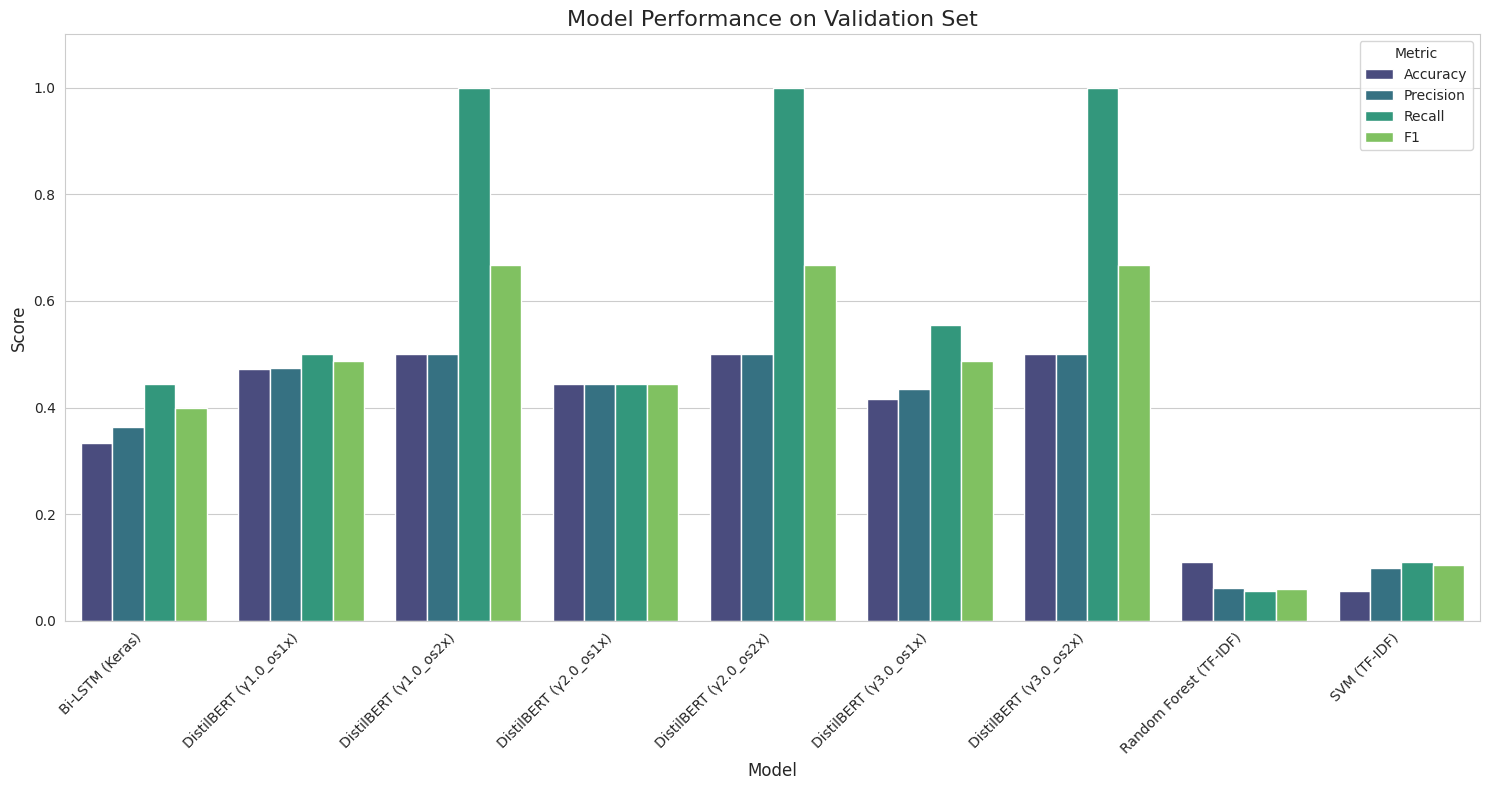

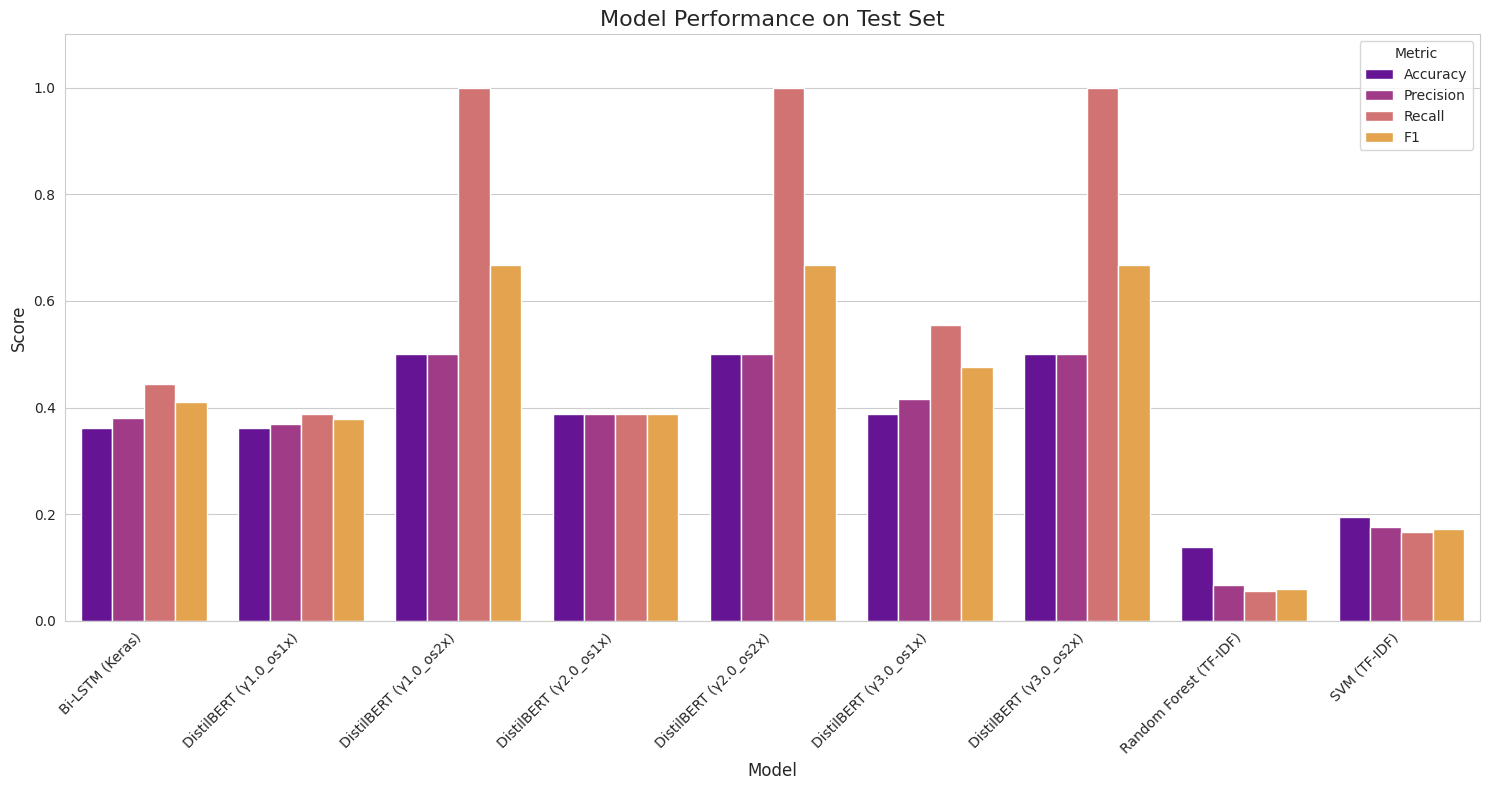

/tmp/ipython-input-14-3740087509.py:176: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=test_metrics_df, x='Model', y=metric, palette='viridis')


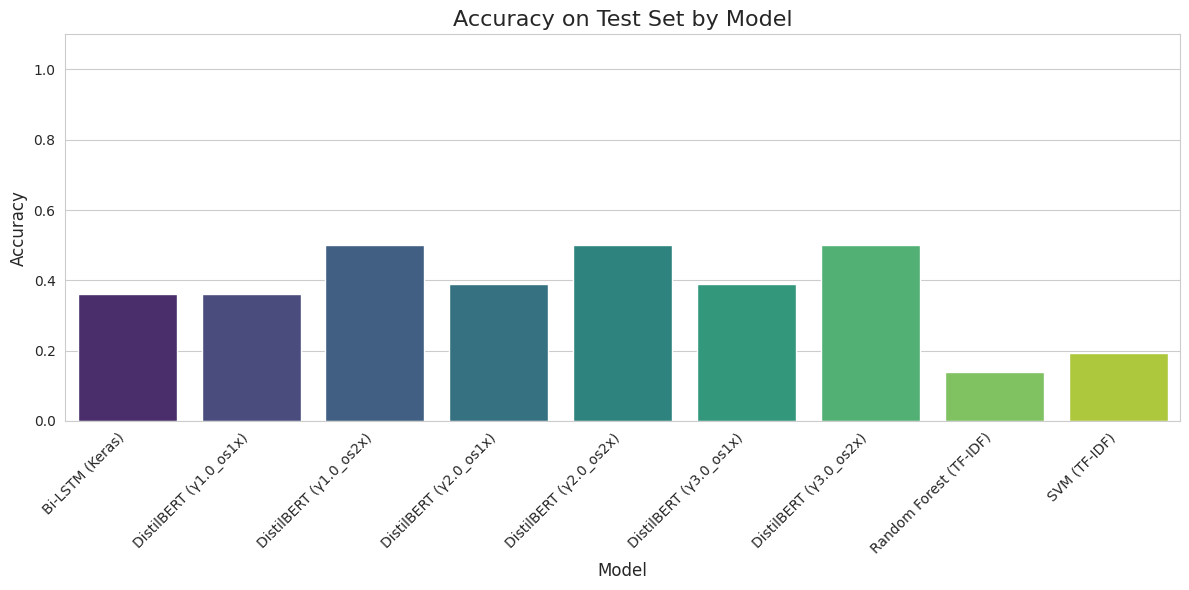

/tmp/ipython-input-14-3740087509.py:176: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=test_metrics_df, x='Model', y=metric, palette='viridis')


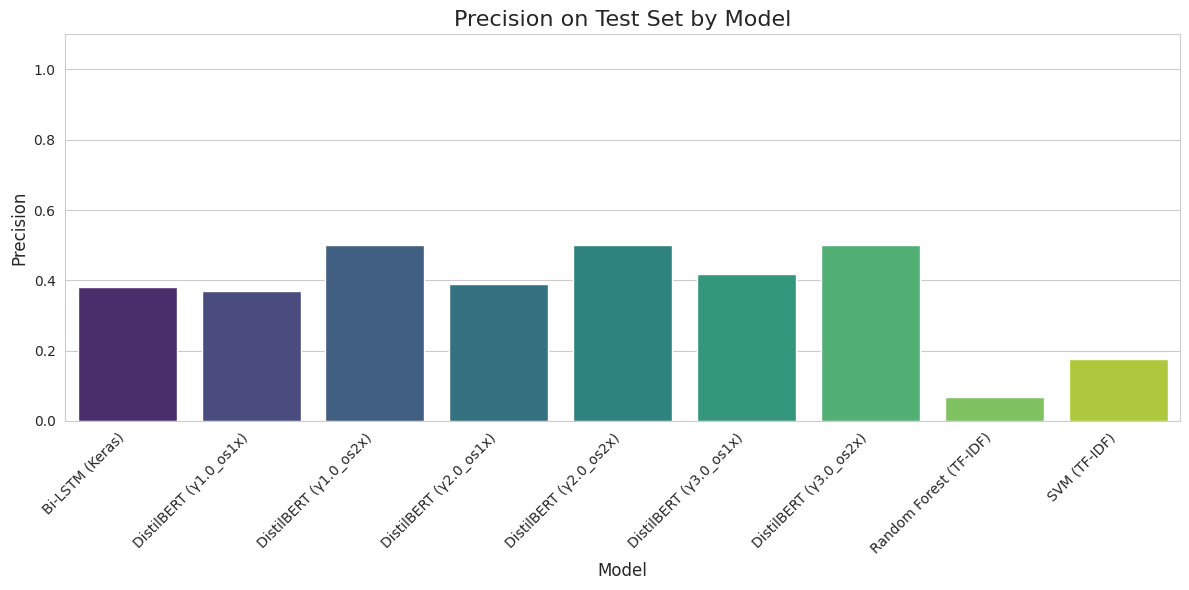

/tmp/ipython-input-14-3740087509.py:176: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=test_metrics_df, x='Model', y=metric, palette='viridis')


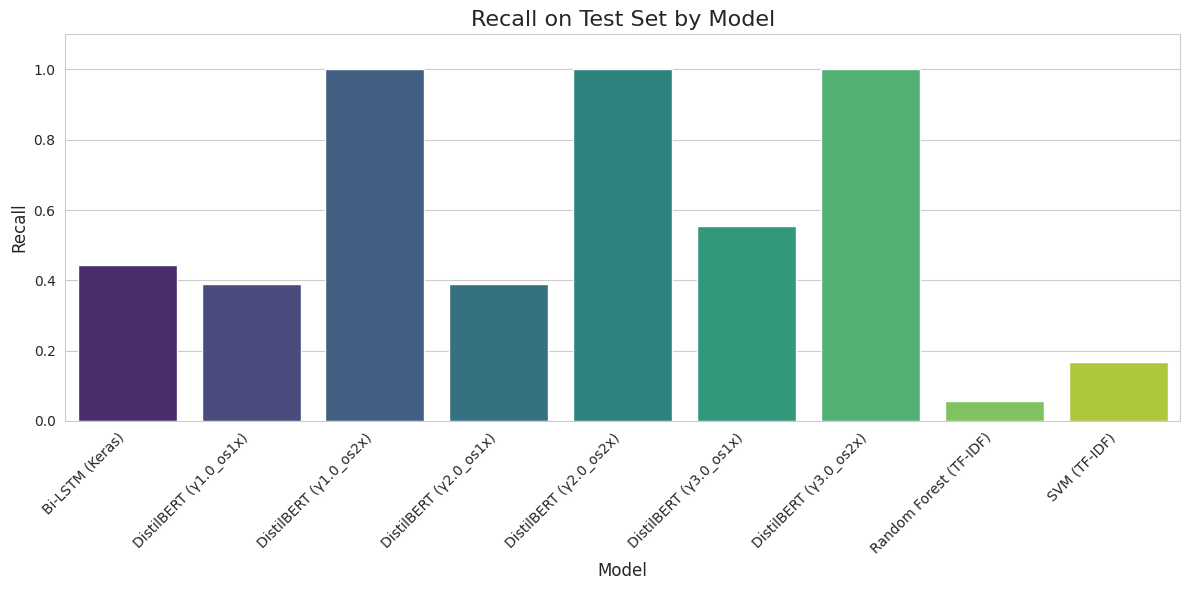

/tmp/ipython-input-14-3740087509.py:176: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=test_metrics_df, x='Model', y=metric, palette='viridis')


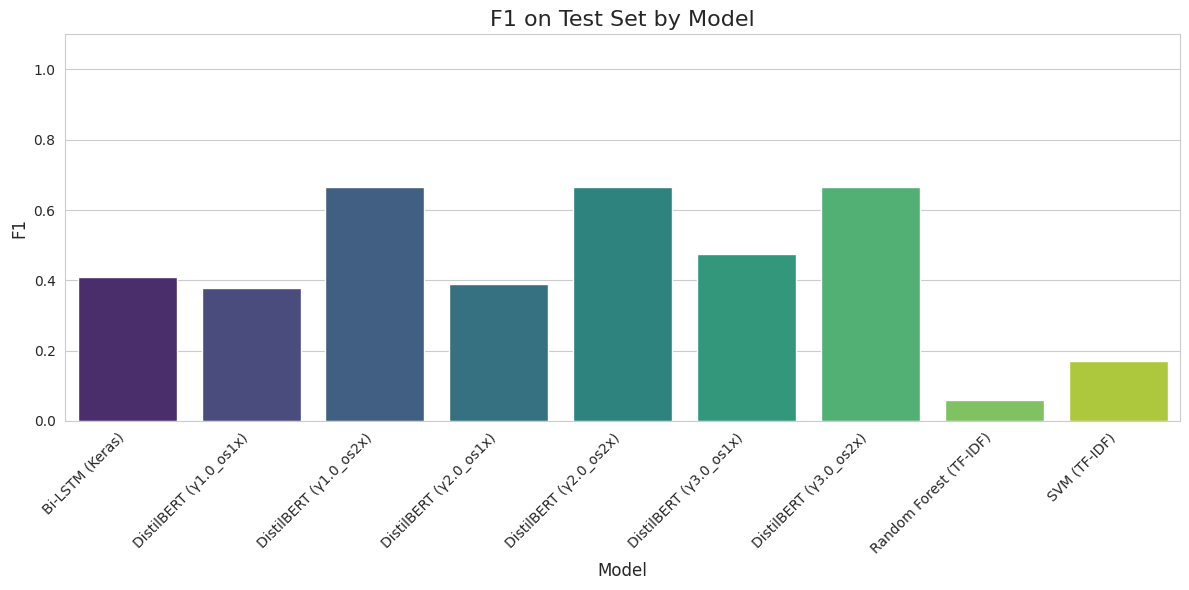

In [14]:
from sklearn.metrics import f1_score

def calculate_keras_f1(model, X, y):
    y_pred_proba = model.predict(X)
    y_pred = (y_pred_proba > 0.5).astype(int)
    return f1_score(y, y_pred, average='binary')

comparison_results = []

svm_val_preds = svm.predict(X_val)
svm_test_preds = svm.predict(X_test)

comparison_results.append({
    'Model': 'SVM (TF-IDF)',
    'Metric': 'Validation',
    'Accuracy': accuracy_score(y_val, svm_val_preds),
    'Precision': precision_recall_fscore_support(y_val, svm_val_preds, average='binary', zero_division=0)[0],
    'Recall': precision_recall_fscore_support(y_val, svm_val_preds, average='binary', zero_division=0)[1],
    'F1': f1_score(y_val, svm_val_preds, average='binary')
})

comparison_results.append({
    'Model': 'SVM (TF-IDF)',
    'Metric': 'Test',
    'Accuracy': accuracy_score(y_test, svm_test_preds),
    'Precision': precision_recall_fscore_support(y_test, svm_test_preds, average='binary', zero_division=0)[0],
    'Recall': precision_recall_fscore_support(y_test, svm_test_preds, average='binary', zero_division=0)[1],
    'F1': f1_score(y_test, svm_test_preds, average='binary')
})

rf_val_preds = rf.predict(X_val)
rf_test_preds = rf.predict(X_test)

comparison_results.append({
    'Model': 'Random Forest (TF-IDF)',
    'Metric': 'Validation',
    'Accuracy': accuracy_score(y_val, rf_val_preds),
    'Precision': precision_recall_fscore_support(y_val, rf_val_preds, average='binary', zero_division=0)[0],
    'Recall': precision_recall_fscore_support(y_val, rf_val_preds, average='binary', zero_division=0)[1],
    'F1': f1_score(y_val, rf_val_preds, average='binary')
})

comparison_results.append({
    'Model': 'Random Forest (TF-IDF)',
    'Metric': 'Test',
    'Accuracy': accuracy_score(y_test, rf_test_preds),
    'Precision': precision_recall_fscore_support(y_test, rf_test_preds, average='binary', zero_division=0)[0],
    'Recall': precision_recall_fscore_support(y_test, rf_test_preds, average='binary', zero_division=0)[1],
    'F1': f1_score(y_test, rf_test_preds, average='binary')
})


bi_lstm_val_metrics = model.evaluate(X_va, y_va, verbose=0)
bi_lstm_test_metrics = model.evaluate(X_te, y_te, verbose=0)

bi_lstm_val_f1 = calculate_keras_f1(model, X_va, y_va)
bi_lstm_test_f1 = calculate_keras_f1(model, X_te, y_te)

comparison_results.append({
    'Model': 'Bi-LSTM (Keras)',
    'Metric': 'Validation',
    'Accuracy': bi_lstm_val_metrics[1],
    'Precision': bi_lstm_val_metrics[2],
    'Recall': bi_lstm_val_metrics[3],
    'F1': bi_lstm_val_f1
})

comparison_results.append({
    'Model': 'Bi-LSTM (Keras)',
    'Metric': 'Test',
    'Accuracy': bi_lstm_test_metrics[1],
    'Precision': bi_lstm_test_metrics[2],
    'Recall': bi_lstm_test_metrics[3],
    'F1': bi_lstm_test_f1
})


for res in results:
    comparison_results.append({
        'Model': f"DistilBERT ({res['run']})",
        'Metric': 'Validation',
        'Accuracy': res['accuracy'],
        'Precision': res['precision'],
        'Recall': res['recall'],
        'F1': res['f1']
    })
    comparison_results.append({
        'Model': f"DistilBERT ({res['run']})",
        'Metric': 'Test',
        'Accuracy': res['test_accuracy'],
        'Precision': res['test_precision'],
        'Recall': res['test_recall'],
        'F1': res['test_f1']
    })


comparison_df = pd.DataFrame(comparison_results)

pivot_table = comparison_df.pivot_table(
    index=['Model', 'Metric'],
    values=['Accuracy', 'Precision', 'Recall', 'F1']
).reset_index()

pivot_table = pivot_table[['Model', 'Metric', 'Accuracy', 'Precision', 'Recall', 'F1']]

print("=== Model Comparison Table ===")
print(pivot_table.to_string())

import matplotlib.pyplot as plt
import seaborn as sns

val_metrics_df = pivot_table[pivot_table['Metric'] == 'Validation'].copy()
test_metrics_df = pivot_table[pivot_table['Metric'] == 'Test'].copy()

val_melted = val_metrics_df.melt(
    id_vars='Model',
    value_vars=['Accuracy', 'Precision', 'Recall', 'F1'],
    var_name='Metric Type',
    value_name='Score'
)

test_melted = test_metrics_df.melt(
    id_vars='Model',
    value_vars=['Accuracy', 'Precision', 'Recall', 'F1'],
    var_name='Metric Type',
    value_name='Score'
)

sns.set_style("whitegrid")

plt.figure(figsize=(15, 8))
sns.barplot(data=val_melted, x='Model', y='Score', hue='Metric Type', palette='viridis')
plt.title('Model Performance on Validation Set', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylim(0, 1.1)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 8))
sns.barplot(data=test_melted, x='Model', y='Score', hue='Metric Type', palette='plasma')
plt.title('Model Performance on Test Set', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylim(0, 1.1)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1']

for metric in metrics_to_plot:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=test_metrics_df, x='Model', y=metric, palette='viridis')
    plt.title(f'{metric} on Test Set by Model', fontsize=16)
    plt.ylabel(metric, fontsize=12)
    plt.xlabel('Model', fontsize=12)
    plt.ylim(0, 1.1)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Loading DistilBERT model from ./best_γ1.0_os1x for ROC curve...


/tmp/ipython-input-15-3832355576.py:29: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  pred_trainer = Trainer(


Loading DistilBERT model from ./best_γ1.0_os2x for ROC curve...


Loading DistilBERT model from ./best_γ2.0_os1x for ROC curve...


Loading DistilBERT model from ./best_γ2.0_os2x for ROC curve...


Loading DistilBERT model from ./best_γ3.0_os1x for ROC curve...


Loading DistilBERT model from ./best_γ3.0_os2x for ROC curve...


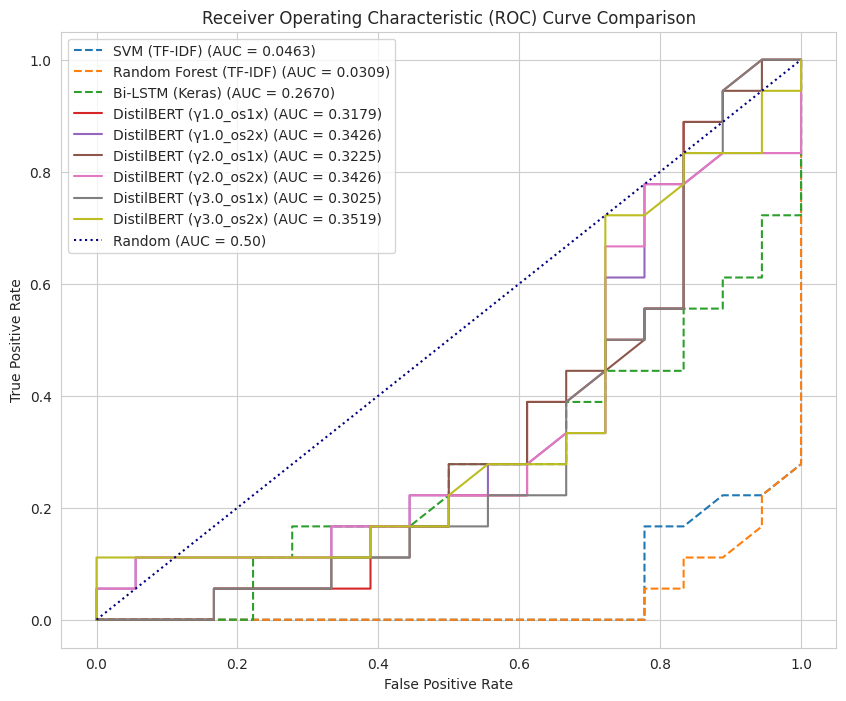


--- Test Set AUC Scores ---
SVM (TF-IDF): 0.0463
Random Forest (TF-IDF): 0.0309
Bi-LSTM (Keras): 0.2670
DistilBERT (γ1.0_os1x): 0.3179
DistilBERT (γ1.0_os2x): 0.3426
DistilBERT (γ2.0_os1x): 0.3225
DistilBERT (γ2.0_os2x): 0.3426
DistilBERT (γ3.0_os1x): 0.3025
DistilBERT (γ3.0_os2x): 0.3519


In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

svm_val_scores = svm.decision_function(X_val)
svm_test_scores = svm.decision_function(X_test)

rf_val_probs = rf.predict_proba(X_val)[:, 1]
rf_test_probs = rf.predict_proba(X_test)[:, 1]

bi_lstm_val_probs = model.predict(X_va).ravel()
bi_lstm_test_probs = model.predict(X_te).ravel()

distilbert_test_probs = {}
for res in results:
    run_name = res['run']
    ckpt_dir = res['checkpoint']
    print(f"Loading DistilBERT model from {ckpt_dir} for ROC curve...")
    model_distilbert = AutoModelForSequenceClassification.from_pretrained(ckpt_dir)
    tokenizer_distilbert = AutoTokenizer.from_pretrained(ckpt_dir)

    pred_args = TrainingArguments(
        output_dir=f"./pred_results_{run_name}",
        per_device_eval_batch_size=BATCH*2,
        do_predict=True,
        report_to="none",
    )

    pred_trainer = Trainer(
        model=model_distilbert,
        args=pred_args,
        eval_dataset=hf_test,
        tokenizer=tokenizer_distilbert,
        data_collator=data_collator,
    )

    predictions = pred_trainer.predict(hf_test)
    logits = predictions.predictions

    probs = torch.softmax(torch.tensor(logits), dim=1)[:, 1].numpy()
    distilbert_test_probs[run_name] = probs

plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")

fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_test_scores)
auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, linestyle='--', label=f'SVM (TF-IDF) (AUC = {auc_svm:.4f})')

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_test_probs)
auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, linestyle='--', label=f'Random Forest (TF-IDF) (AUC = {auc_rf:.4f})')

fpr_bilstm, tpr_bilstm, _ = roc_curve(y_te, bi_lstm_test_probs)
auc_bilstm = auc(fpr_bilstm, tpr_bilstm)
plt.plot(fpr_bilstm, tpr_bilstm, linestyle='--', label=f'Bi-LSTM (Keras) (AUC = {auc_bilstm:.4f})')

for run_name, probs in distilbert_test_probs.items():
    fpr_distilbert, tpr_distilbert, _ = roc_curve(hf_test['label'].numpy(), probs)
    auc_distilbert = auc(fpr_distilbert, tpr_distilbert)
    plt.plot(fpr_distilbert, tpr_distilbert, label=f'DistilBERT ({run_name}) (AUC = {auc_distilbert:.4f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle=':', label='Random (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

print("\n--- Test Set AUC Scores ---")
print(f"SVM (TF-IDF): {auc_svm:.4f}")
print(f"Random Forest (TF-IDF): {auc_rf:.4f}")
print(f"Bi-LSTM (Keras): {auc_bilstm:.4f}")
for run_name, probs in distilbert_test_probs.items():
    auc_distilbert = auc(roc_curve(hf_test['label'].numpy(), probs)[0], roc_curve(hf_test['label'].numpy(), probs)[1])
    print(f"DistilBERT ({run_name}): {auc_distilbert:.4f}")

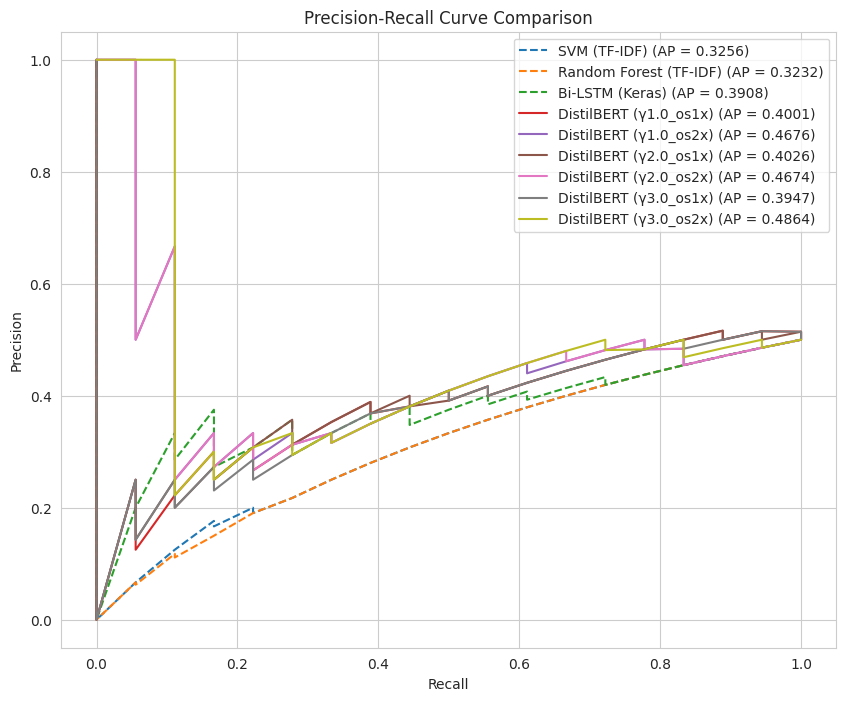


--- Test Set Average Precision Scores ---
SVM (TF-IDF): 0.3256
Random Forest (TF-IDF): 0.3232
Bi-LSTM (Keras): 0.3908
DistilBERT (γ1.0_os1x): 0.4001
DistilBERT (γ1.0_os2x): 0.4676
DistilBERT (γ2.0_os1x): 0.4026
DistilBERT (γ2.0_os2x): 0.4674
DistilBERT (γ3.0_os1x): 0.3947
DistilBERT (γ3.0_os2x): 0.4864


In [16]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")

precision_svm, recall_svm, _ = precision_recall_curve(y_test, svm_test_scores)
ap_svm = average_precision_score(y_test, svm_test_scores)
plt.plot(recall_svm, precision_svm, linestyle='--', label=f'SVM (TF-IDF) (AP = {ap_svm:.4f})')

precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_test_probs)
ap_rf = average_precision_score(y_test, rf_test_probs)
plt.plot(recall_rf, precision_rf, linestyle='--', label=f'Random Forest (TF-IDF) (AP = {ap_rf:.4f})')

precision_bilstm, recall_bilstm, _ = precision_recall_curve(y_te, bi_lstm_test_probs)
ap_bilstm = average_precision_score(y_te, bi_lstm_test_probs)
plt.plot(recall_bilstm, precision_bilstm, linestyle='--', label=f'Bi-LSTM (Keras) (AP = {ap_bilstm:.4f})')

for run_name, probs in distilbert_test_probs.items():
    precision_distilbert, recall_distilbert, _ = precision_recall_curve(hf_test['label'].numpy(), probs)
    ap_distilbert = average_precision_score(hf_test['label'].numpy(), probs)
    plt.plot(recall_distilbert, precision_distilbert, label=f'DistilBERT ({run_name}) (AP = {ap_distilbert:.4f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

print("\n--- Test Set Average Precision Scores ---")
print(f"SVM (TF-IDF): {ap_svm:.4f}")
print(f"Random Forest (TF-IDF): {ap_rf:.4f}")
print(f"Bi-LSTM (Keras): {ap_bilstm:.4f}")
for run_name, probs in distilbert_test_probs.items():
    ap_distilbert = average_precision_score(hf_test['label'].numpy(), probs)
    print(f"DistilBERT ({run_name}): {ap_distilbert:.4f}")